In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os
import matplotlib

import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.metrics import r2_score

import altair as alt

In [2]:
df = pd.read_csv('../data/lob_data.csv')

<AxesSubplot:>

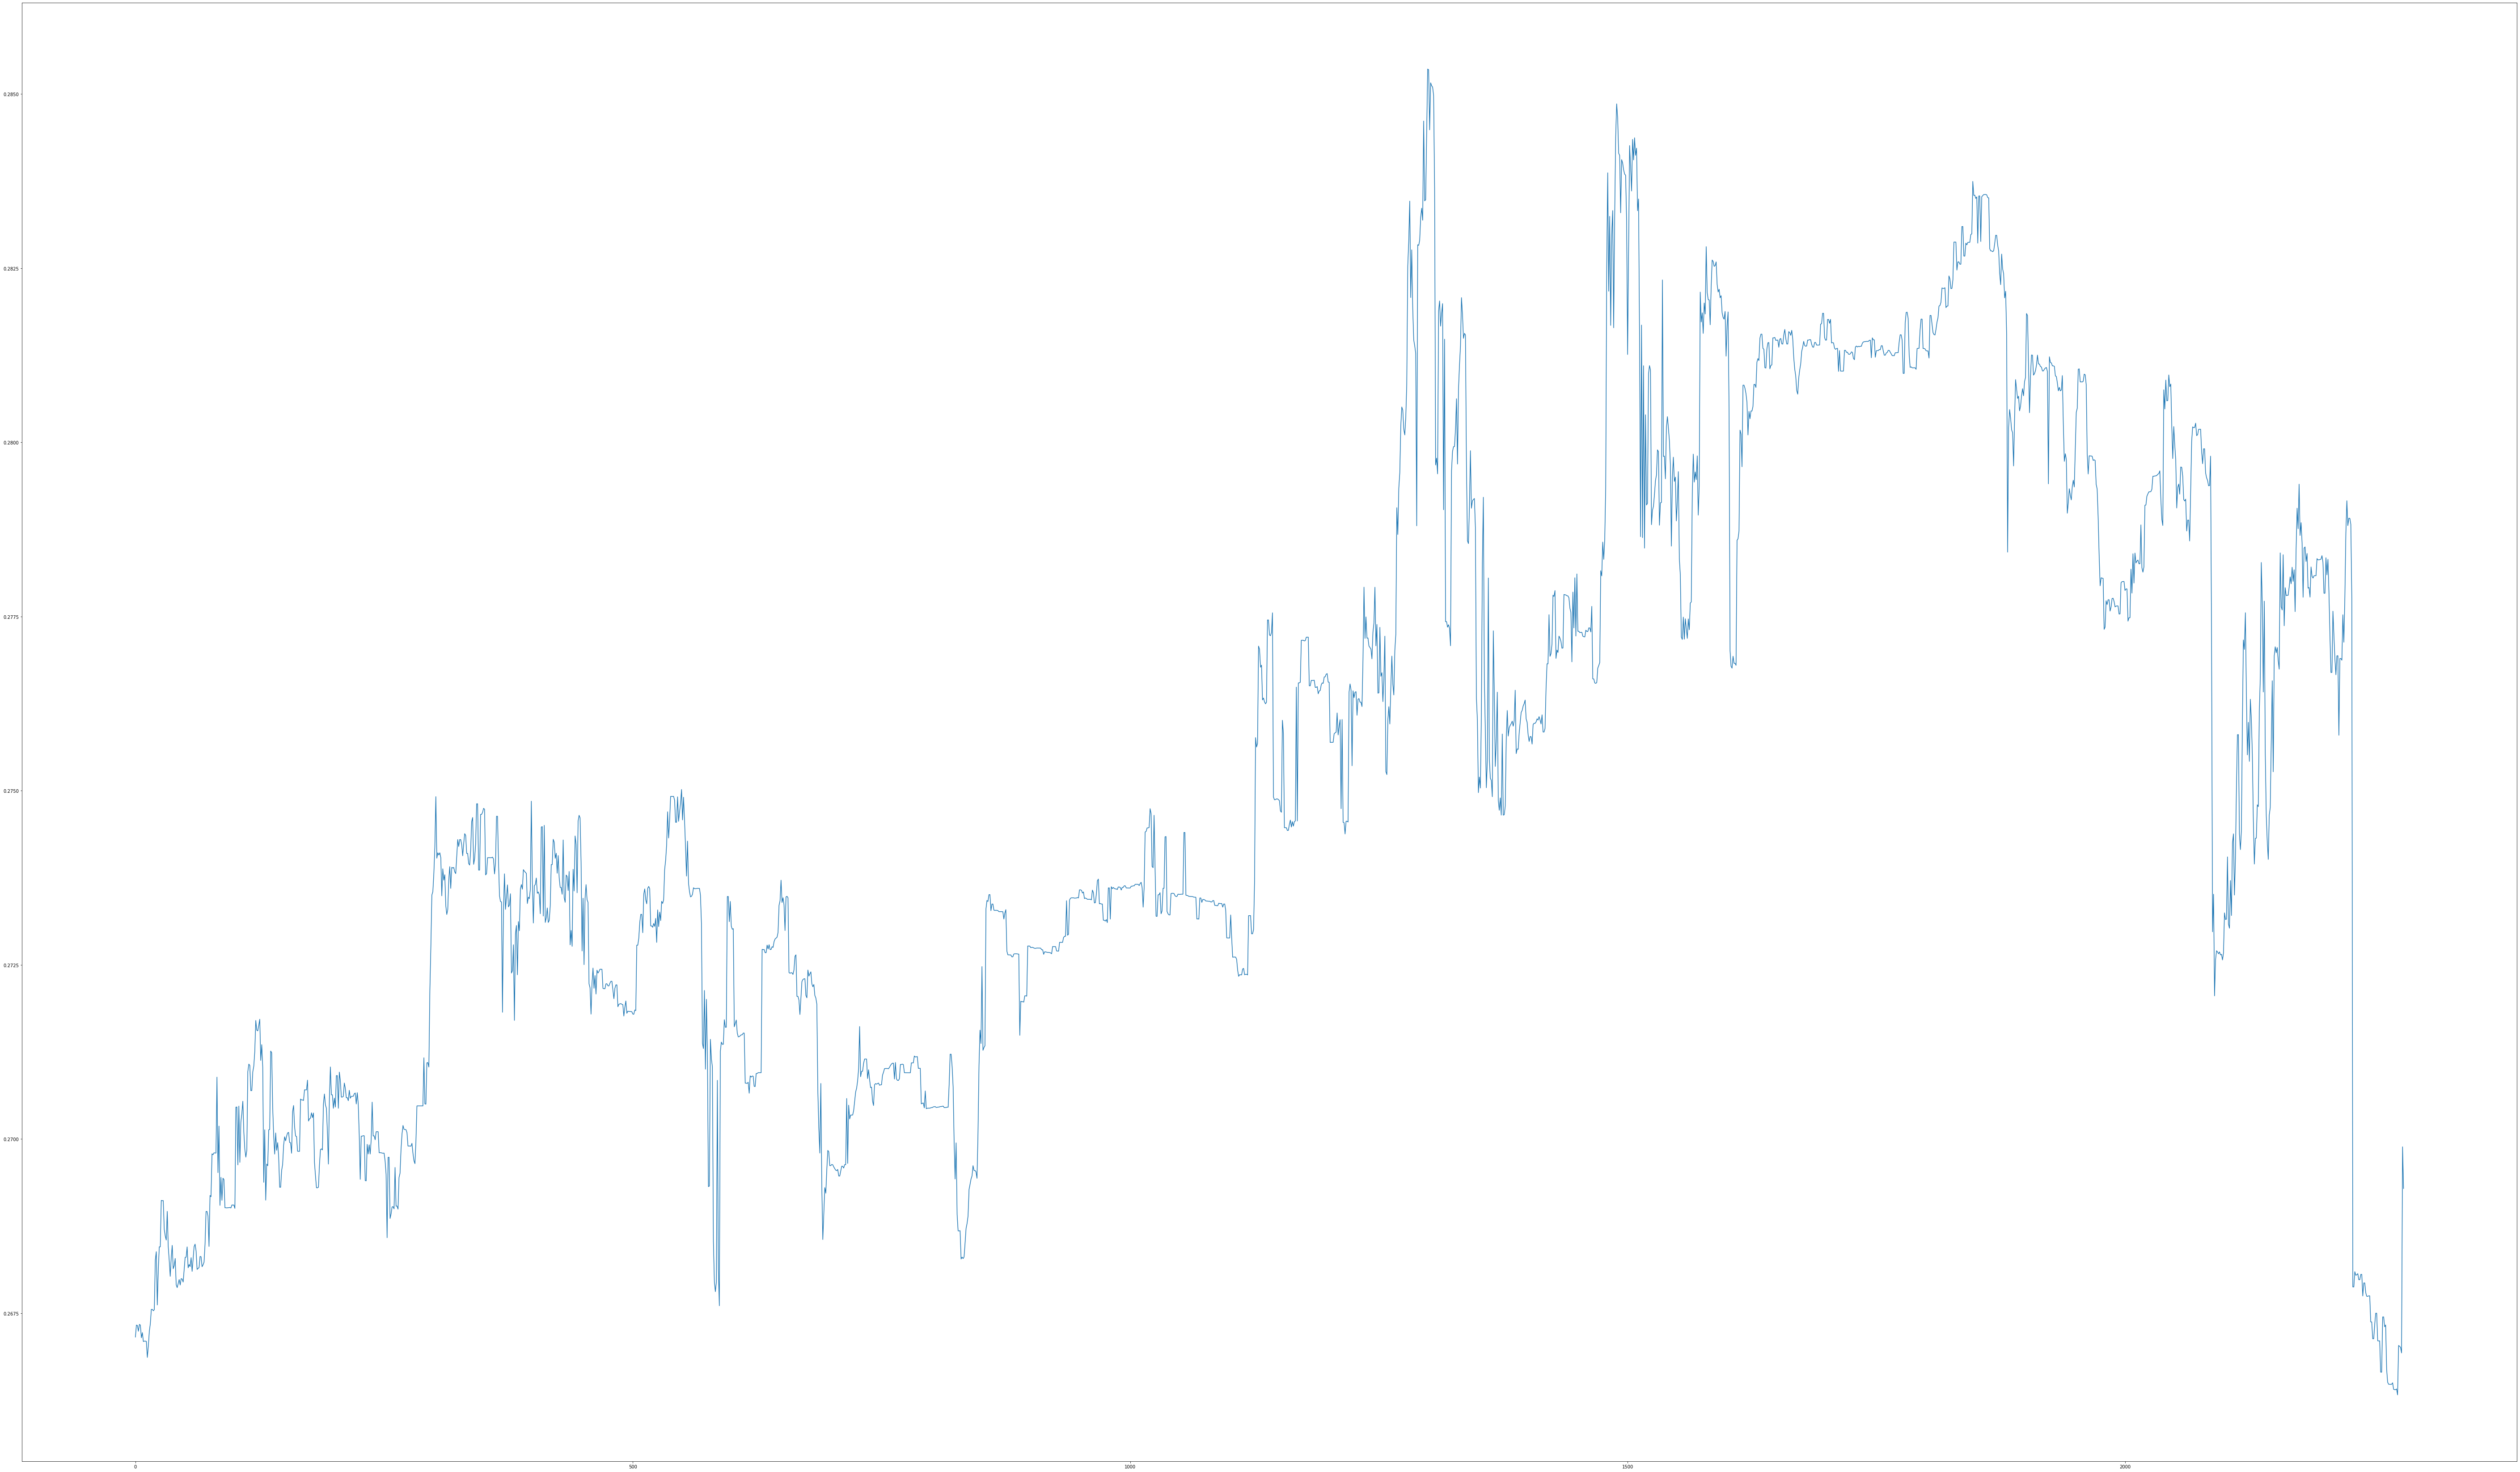

In [43]:
df.vwap.plot()

In [4]:
def append_wap(df):
    for i in range(10):
        df[f'wap_{i}'] = (df[f'bids_price_{i}'] * df[f'asks_amount_{i}'] + df[f'asks_price_{i}'] * df[f'bids_amount_{i}']) / (df[f'bids_amount_{i}']+ df[f'asks_amount_{i}'])
    return df


In [6]:
df = append_wap(df)

In [63]:
df_price = df[df.columns[range(0,10)].tolist() + df.columns[range(20,30)].tolist()]


In [65]:
df_price = df_price.stack().to_frame()
df_price.reset_index(inplace=True)

In [67]:
df_price.columns = ['timestamp', 'subject', 'amount']

In [71]:
df_price

timestamp       subject  amount
0              0  asks_price_0   0.268
1              0  asks_price_1   0.269
2              0  asks_price_2   0.269
3              0  asks_price_3   0.269
4              0  asks_price_4   0.269
...          ...           ...     ...
45615       2280  bids_price_5   0.266
45616       2280  bids_price_6   0.266
45617       2280  bids_price_7   0.266
45618       2280  bids_price_8   0.266
45619       2280  bids_price_9   0.265

[45620 rows x 3 columns]

In [75]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [70]:
matplotlib.rcParams['figure.figsize'] = [100, 50]

In [64]:
df

asks_price_0  asks_price_1  asks_price_2  asks_price_3  asks_price_4  \
456          0.273         0.275         0.275         0.276         0.276   
457          0.273         0.275         0.275         0.276         0.276   
458          0.274         0.275         0.275         0.276         0.276   
459          0.274         0.275         0.275         0.276         0.276   
460          0.274         0.275         0.275         0.276         0.276   
...            ...           ...           ...           ...           ...   
2276         0.269         0.269         0.269         0.270         0.270   
2277         0.269         0.269         0.269         0.269         0.270   
2278         0.268         0.268         0.269         0.269         0.269   
2279         0.267         0.272         0.272         0.272         0.272   
2280         0.267         0.272         0.272         0.272         0.272   

      asks_price_5  asks_price_6  asks_price_7  asks_price_8  asks_price_9  \
456          0.276         0.277         0.277         0.277         0.278   
457          0.276         0.277         0.277         0.277         0.278   
458          0.276         0.276         0.277         0.277         0.277   
459          0.276         0.276         0.277         0.277         0.277   
460          0.276         0.276         0.277         0.277         0.277   
...            ...           ...           ...           ...           ...   
2276         0.270         0.270         0.270         0.271         0.272   
2277         0.270         0.270         0.270         0.270         0.271   
2278         0.269         0.270         0.270         0.270         0.270   
2279         0.272         0.272         0.272         0.272         0.275   
2280         0.272         0.272         0.272         0.272         0.272   

      ...     wap_2     wap_3     wap_4     wap_5     wap_6     wap_7  \
456   ...  0.274903  0.275999  0.275627  0.275924  0.271467  0.276545   
457   ...  0.274899  0.275421  0.275627  0.275924  0.271467  0.276545   
458   ...  0.274545  0.274265  0.271182  0.275729  0.275868  0.276562   
459   ...  0.274897  0.274192  0.274384  0.272278  0.275943  0.274823   
460   ...  0.274897  0.274192  0.274384  0.272278  0.275943  0.274823   
...   ...       ...       ...       ...       ...       ...       ...   
2276  ...  0.268881  0.269963  0.266178  0.266964  0.269671  0.266524   
2277  ...  0.267410  0.268924  0.269821  0.267568  0.265732  0.269671   
2278  ...  0.268613  0.267434  0.266095  0.268890  0.269804  0.266094   
2279  ...  0.266642  0.269915  0.268178  0.269078  0.268092  0.267130   
2280  ...  0.268093  0.266445  0.270695  0.269078  0.268753  0.267042   

         wap_8     wap_9      vwap  vwap_est  
456   0.276729  0.270283  0.272228  0.271982  
457   0.276270  0.277423  0.272172  0.272179  
458   0.271520  0.276664  0.271793  0.272220  
459   0.276929  0.270461  0.272235  0.272265  
460   0.276929  0.270461  0.272454  0.272391  
...        ...       ...       ...       ...  
2276  0.268280  0.271489  0.267026  0.266994  
2277  0.266479  0.270414  0.267009  0.266729  
2278  0.265732  0.269954  0.266930  0.266810  
2279  0.267223  0.267227  0.269889  0.270210  
2280  0.268781  0.266172  0.269290  0.269395  

[1825 rows x 52 columns]

In [68]:
df['vwap_est'] = (df.vwap + np.random.randn(df.shape[0])/5000)

/tmp/ipykernel_92533/3575477808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vwap_est'] = (df.vwap + np.random.randn(df.shape[0])/5000)


In [66]:
df = df.iloc[int(0.2*df.shape[0]):]

In [ ]:
df

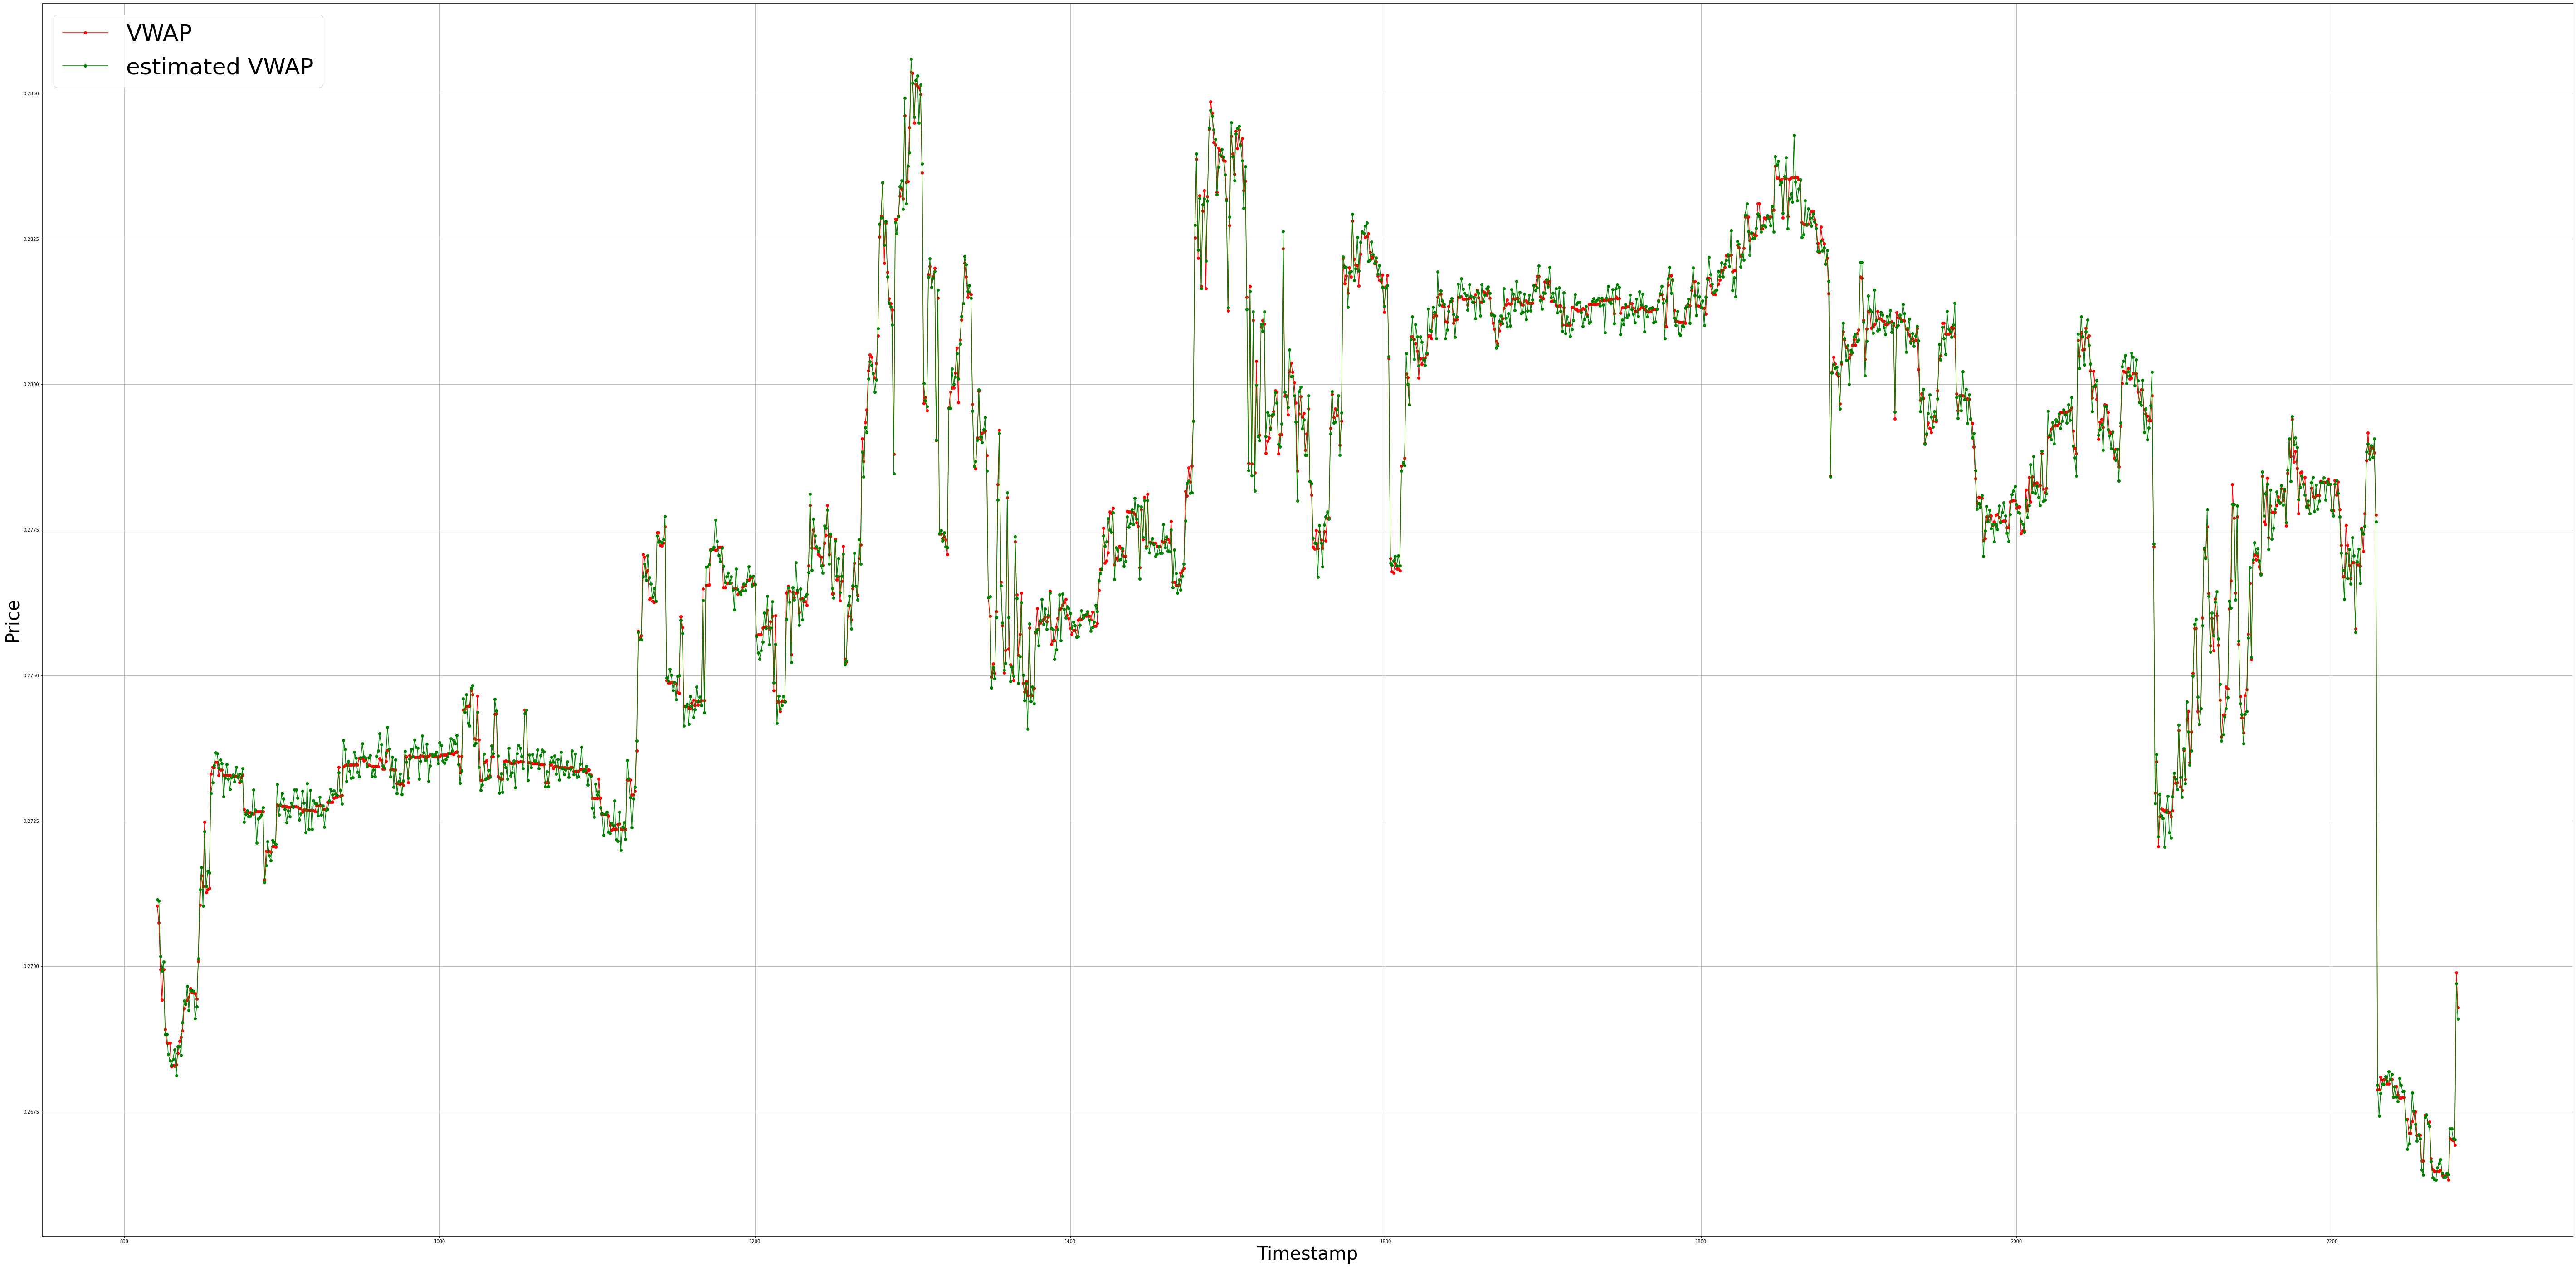

In [71]:
plt.plot(df.index, df[df.columns[-2]], color='red', label='VWAP', marker='o')
# plt.plot(df.index, df[df.columns[20+i]], color='blue', label='', marker='o')
plt.plot(df.index, df[df.columns[-1]], color='green', label='estimated VWAP', marker='o')
plt.legend(loc="upper left",prop={'size': 50})

# plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Timestamp', fontsize=40)
plt.ylabel('Price', fontsize=40)
plt.grid(True)
plt.show()

In [ ]:
df[df.co

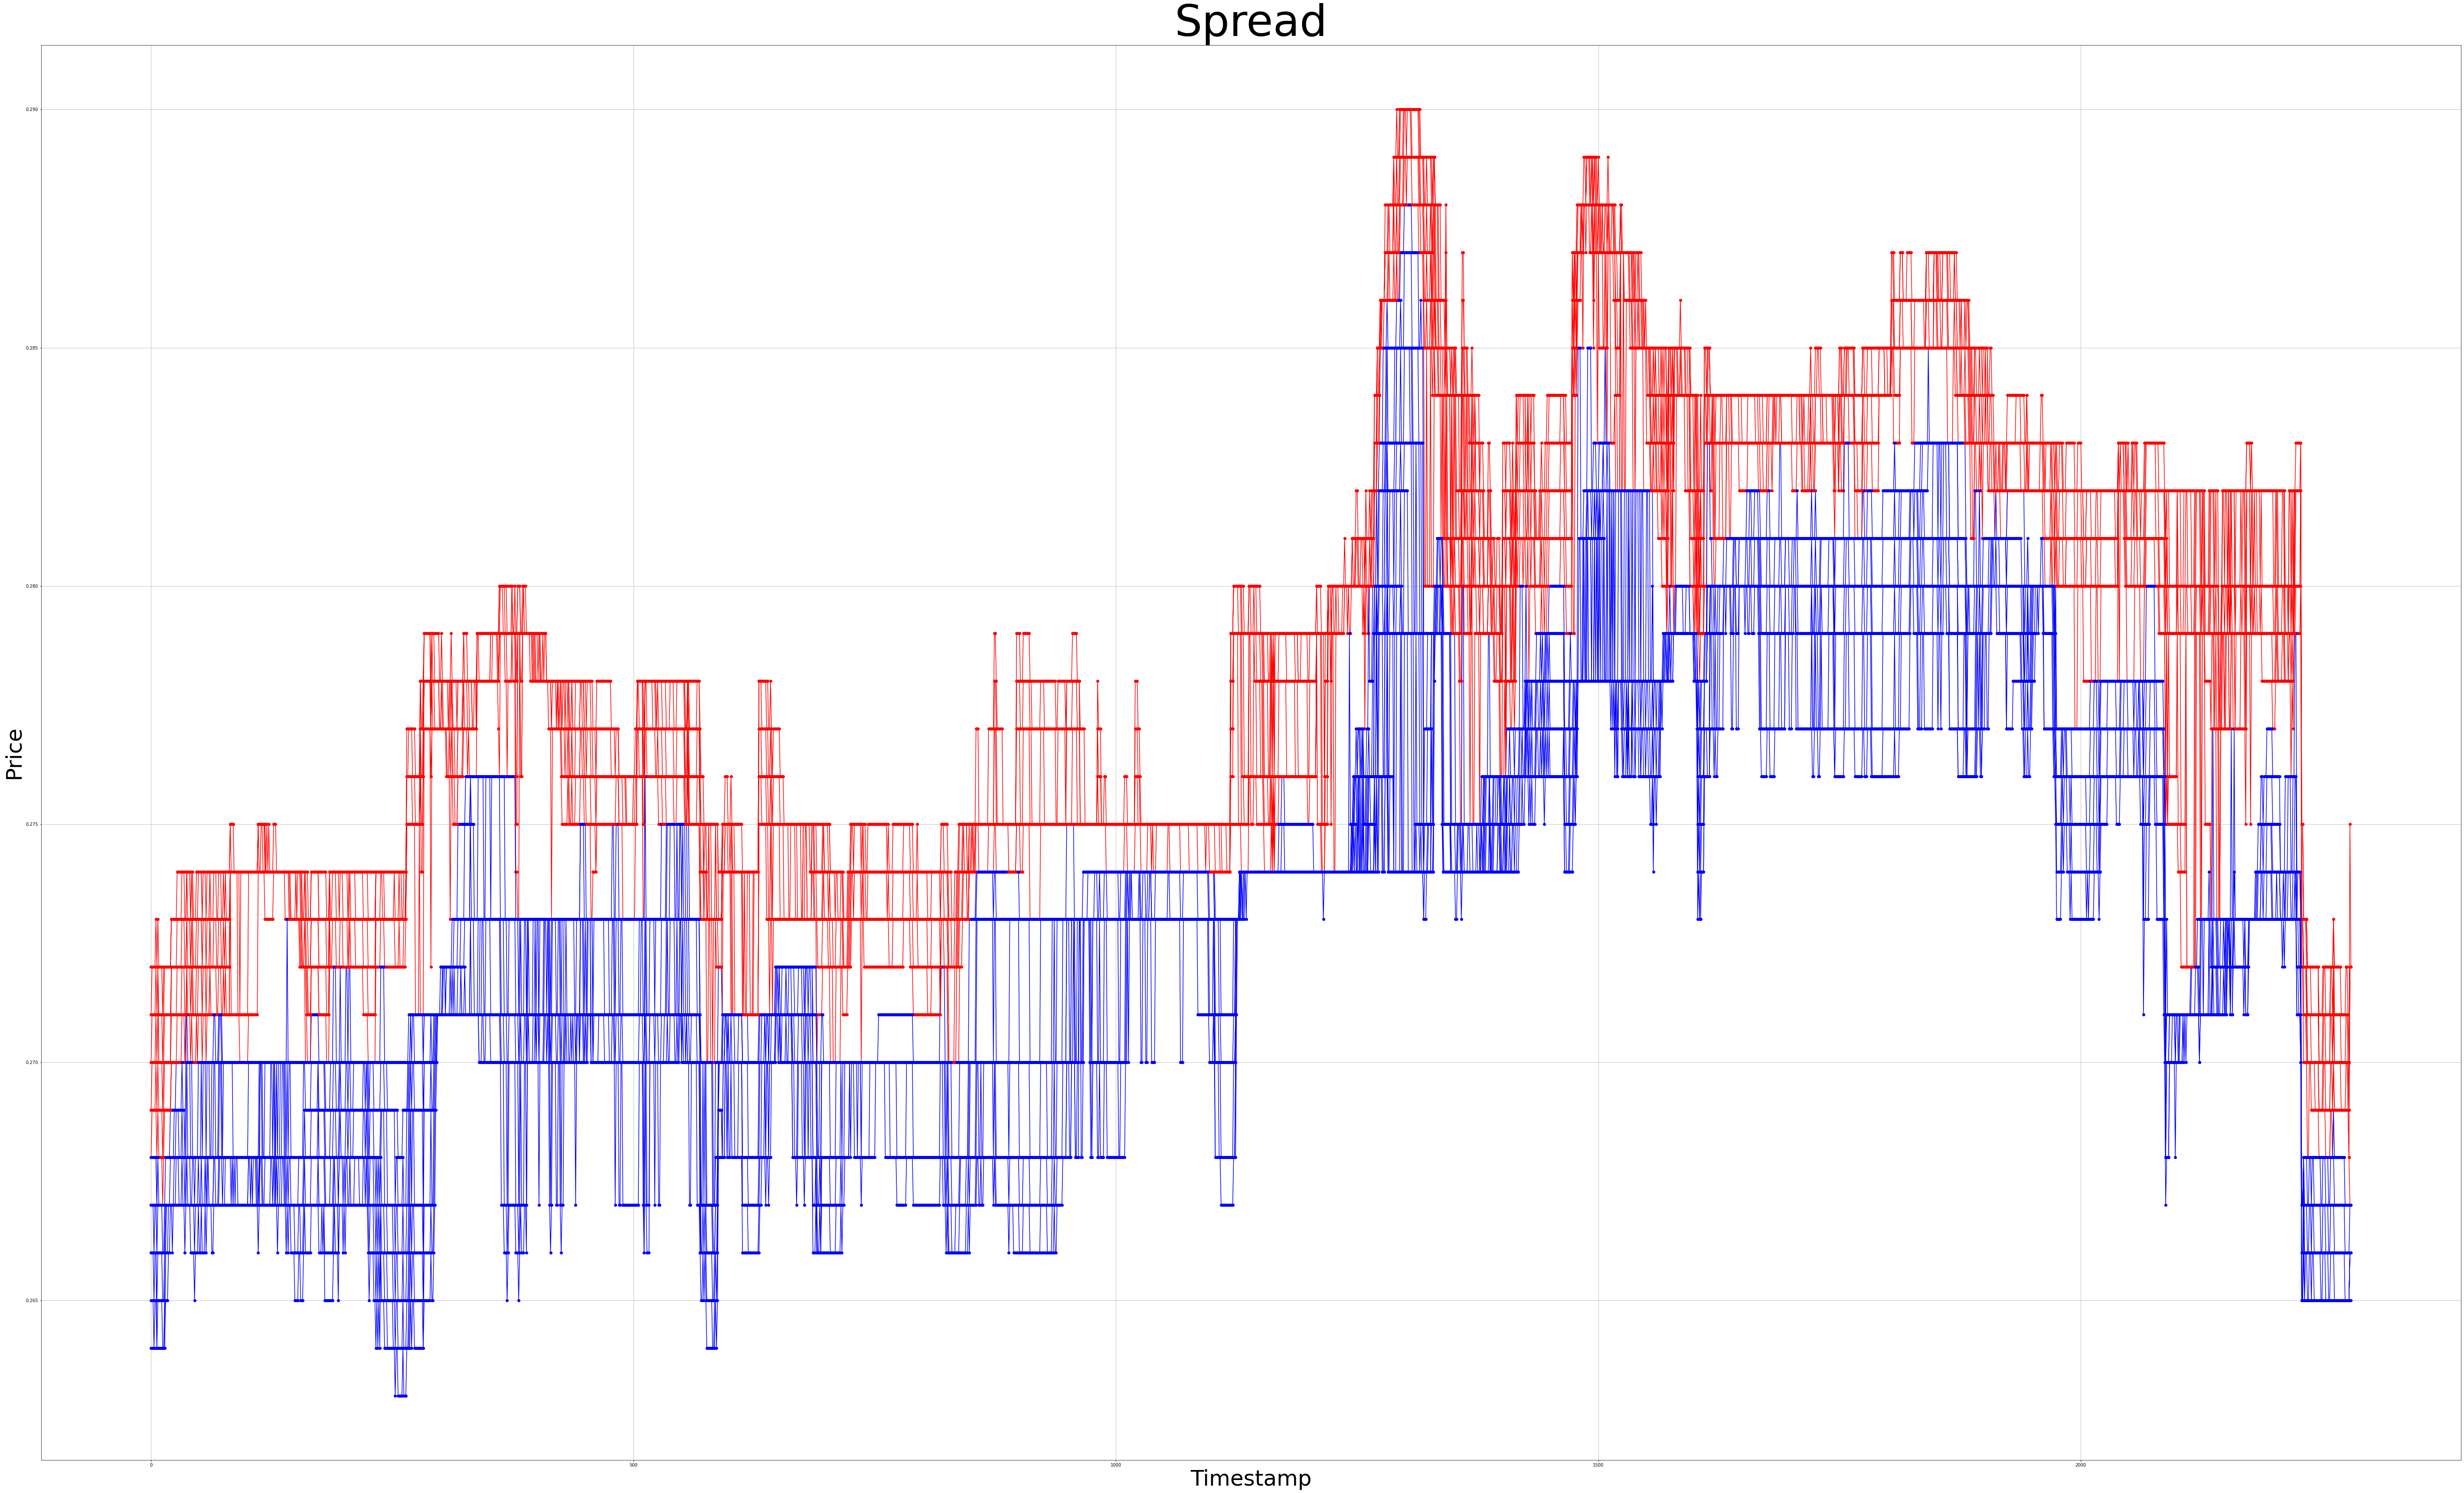

In [39]:
for i in range(10):
    plt.plot(df.index, df[df.columns[0+i]], color='red', marker='o')
    plt.plot(df.index, df[df.columns[20+i]], color='blue', marker='o')
    # plt.plot(df.index, df[df.columns[40+i]], color='green', marker='o')


plt.title('Spread', fontsize=100)
plt.xlabel('Timestamp', fontsize=50)
plt.ylabel('Price', fontsize=50)
plt.grid(True)
plt.show()

ValueError: Data must be 1-dimensional

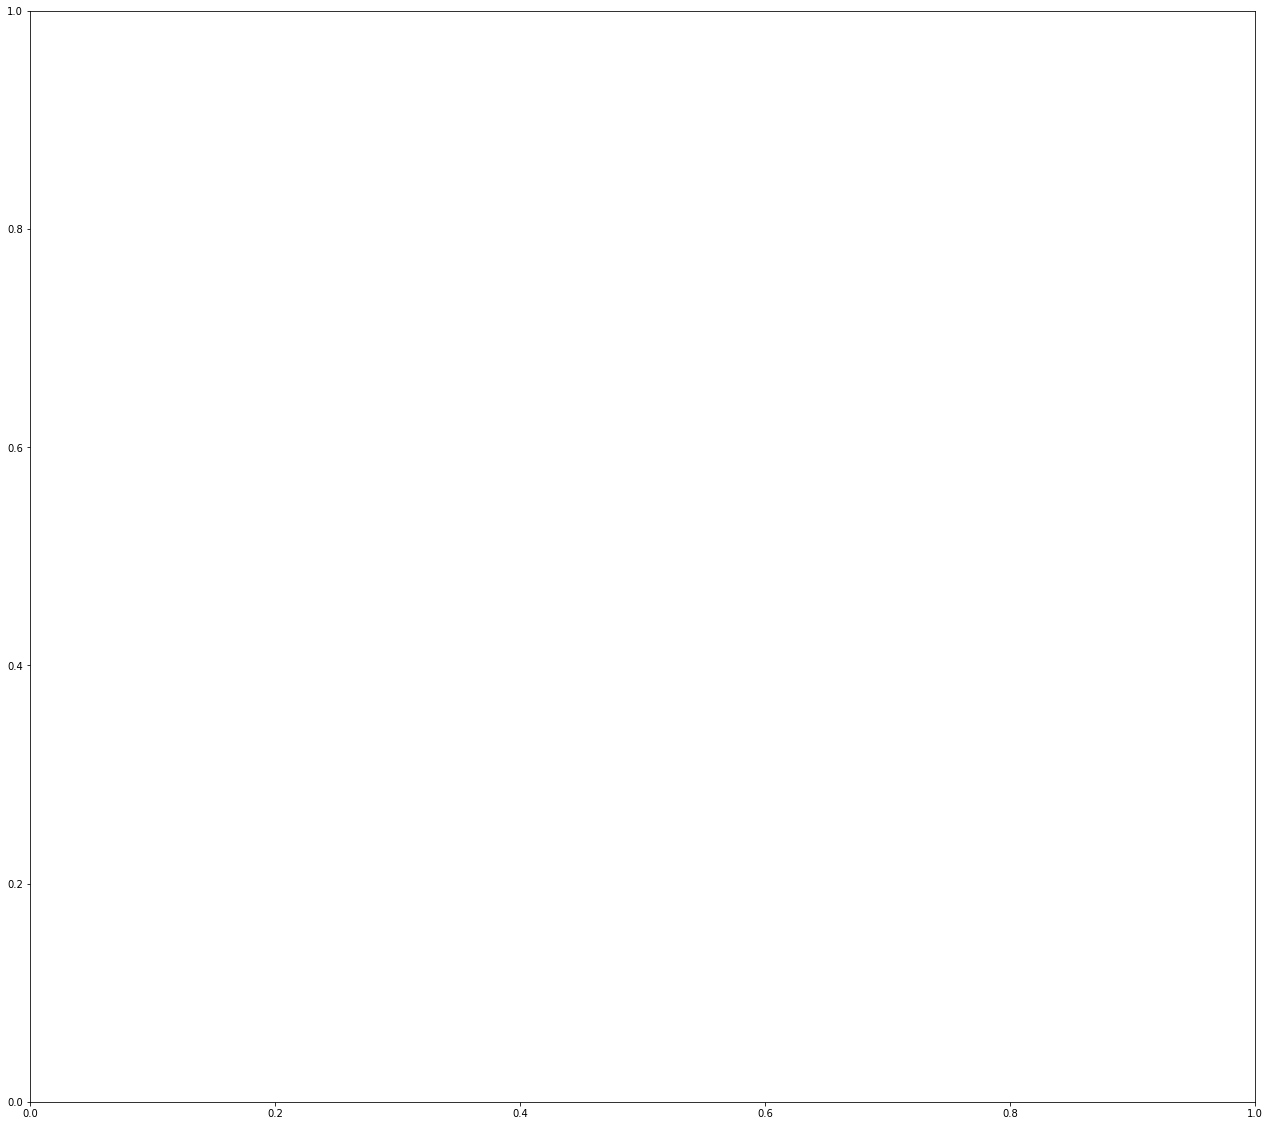

In [43]:


# stock_id_arr = books["stock_id"].unique()
plot_wap(df, 5, 1)



In [4]:


def log_return_hist(books_df, time_id, stock_id_arr):
    fig, ax = plt.subplots(len(stock_id_arr), 1, figsize=(8 , 20))
    fig.tight_layout(pad=4.0)
    
    i= 0
    for stock_id in stock_id_arr:
        mask = np.logical_and(books_df["stock_id"]==stock_id, books_df["time_id"]==time_id)
        realized_vol1 = np.sqrt(np.sum(books_df[mask]['log_return1']**2))
        
        sns.histplot(data=books[mask]["log_return1"], ax= ax[i])
        _std = np.std(books[mask]["log_return1"])
        ax[i].set_title(f'Realized volatility1 for stock_id {stock_id} on time_id {time_id} is {round(realized_vol1, 5)}, teh std is: {round(_std, 5)}',
                        loc='left', fontweight='bold')     
        i+=1
    
    plt.show()



In [ ]:
stock_id_arr = books["stock_id"].unique()
log_return_hist(books, 5, stock_id_arr)

In [42]:
def rr(df, ind): return df[df.columns[range(ind,10+ind)].tolist()].values
vwap = (rr(df, 0)*rr(df, 10) + rr(df, 20)*rr(df, 30)).sum(1)/(rr(df, 10) + rr(df, 30)).sum(1)
df['vwap'] = vwap

In [ ]:
plt.plot(df.index, df[df.columns[0+i]], color='red', marker='o')
plt.plot(df.index, df[df.columns[20+i]], color='blue', marker='o')
    # plt.plot(df.index, df[df.columns[40+i]], color='green', marker='o')


plt.title('Spread', fontsize=100)
plt.xlabel('Timestamp', fontsize=50)
plt.ylabel('Price', fontsize=50)
plt.grid(True)
plt.show()